In [1]:
from scipy.io import loadmat
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models

In [2]:
x = loadmat('cars_annos.mat')

In [3]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [4]:
len(x['annotations'][0])

16185

In [5]:
labels = [car[0] for car in x['class_names'][0]]
labels

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi A5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi TT Hatchback 2011',
 'Audi S6 Sedan 2011',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi TT RS Coupe 2012',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3

In [6]:
frame = [[i[0] for i in line] for line in x['annotations'][0]]
columns = ['img','bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class',"test"]
dfData = pd.DataFrame(frame, columns=columns)
dfData['class'] = dfData['class']-1
dfData.head()

,img,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
0,car_ims/000001.jpg,[112],[7],[853],[717],[0],[0]
1,car_ims/000002.jpg,[48],[24],[441],[202],[0],[0]
2,car_ims/000003.jpg,[7],[4],[277],[180],[0],[0]
3,car_ims/000004.jpg,[33],[50],[197],[150],[0],[0]
4,car_ims/000005.jpg,[5],[8],[83],[58],[0],[0]


In [7]:
dfTrain = dfData.query("test == 0")
dfTest = dfData.query("test == 1")

In [8]:
dfTrain.head()

,img,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
0,car_ims/000001.jpg,[112],[7],[853],[717],[0],[0]
1,car_ims/000002.jpg,[48],[24],[441],[202],[0],[0]
2,car_ims/000003.jpg,[7],[4],[277],[180],[0],[0]
3,car_ims/000004.jpg,[33],[50],[197],[150],[0],[0]
4,car_ims/000005.jpg,[5],[8],[83],[58],[0],[0]


In [9]:
dfTest.head()

,img,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
45,car_ims/000046.jpg,[14],[16],[268],[169],[0],[1]
46,car_ims/000047.jpg,[10],[18],[89],[61],[0],[1]
47,car_ims/000048.jpg,[111],[54],[365],[190],[0],[1]
48,car_ims/000049.jpg,[9],[33],[479],[276],[0],[1]
49,car_ims/000050.jpg,[9],[3],[93],[41],[0],[1]


In [12]:
for line in x['annotations'][0]:
    for i in line:
        print(i[0])
        break

car_ims/000001.jpg
car_ims/000002.jpg
car_ims/000003.jpg
car_ims/000004.jpg
car_ims/000005.jpg
car_ims/000006.jpg
car_ims/000007.jpg
car_ims/000008.jpg
car_ims/000009.jpg
car_ims/000010.jpg
car_ims/000011.jpg
car_ims/000012.jpg
car_ims/000013.jpg
car_ims/000014.jpg
car_ims/000015.jpg
car_ims/000016.jpg
car_ims/000017.jpg
car_ims/000018.jpg
car_ims/000019.jpg
car_ims/000020.jpg
car_ims/000021.jpg
car_ims/000022.jpg
car_ims/000023.jpg
car_ims/000024.jpg
car_ims/000025.jpg
car_ims/000026.jpg
car_ims/000027.jpg
car_ims/000028.jpg
car_ims/000029.jpg
car_ims/000030.jpg
car_ims/000031.jpg
car_ims/000032.jpg
car_ims/000033.jpg
car_ims/000034.jpg
car_ims/000035.jpg
car_ims/000036.jpg
car_ims/000037.jpg
car_ims/000038.jpg
car_ims/000039.jpg
car_ims/000040.jpg
car_ims/000041.jpg
car_ims/000042.jpg
car_ims/000043.jpg
car_ims/000044.jpg
car_ims/000045.jpg
car_ims/000046.jpg
car_ims/000047.jpg
car_ims/000048.jpg
car_ims/000049.jpg
car_ims/000050.jpg
car_ims/000051.jpg
car_ims/000052.jpg
car_ims/0000

car_ims/003414.jpg
car_ims/003415.jpg
car_ims/003416.jpg
car_ims/003417.jpg
car_ims/003418.jpg
car_ims/003419.jpg
car_ims/003420.jpg
car_ims/003421.jpg
car_ims/003422.jpg
car_ims/003423.jpg
car_ims/003424.jpg
car_ims/003425.jpg
car_ims/003426.jpg
car_ims/003427.jpg
car_ims/003428.jpg
car_ims/003429.jpg
car_ims/003430.jpg
car_ims/003431.jpg
car_ims/003432.jpg
car_ims/003433.jpg
car_ims/003434.jpg
car_ims/003435.jpg
car_ims/003436.jpg
car_ims/003437.jpg
car_ims/003438.jpg
car_ims/003439.jpg
car_ims/003440.jpg
car_ims/003441.jpg
car_ims/003442.jpg
car_ims/003443.jpg
car_ims/003444.jpg
car_ims/003445.jpg
car_ims/003446.jpg
car_ims/003447.jpg
car_ims/003448.jpg
car_ims/003449.jpg
car_ims/003450.jpg
car_ims/003451.jpg
car_ims/003452.jpg
car_ims/003453.jpg
car_ims/003454.jpg
car_ims/003455.jpg
car_ims/003456.jpg
car_ims/003457.jpg
car_ims/003458.jpg
car_ims/003459.jpg
car_ims/003460.jpg
car_ims/003461.jpg
car_ims/003462.jpg
car_ims/003463.jpg
car_ims/003464.jpg
car_ims/003465.jpg
car_ims/0034

car_ims/006913.jpg
car_ims/006914.jpg
car_ims/006915.jpg
car_ims/006916.jpg
car_ims/006917.jpg
car_ims/006918.jpg
car_ims/006919.jpg
car_ims/006920.jpg
car_ims/006921.jpg
car_ims/006922.jpg
car_ims/006923.jpg
car_ims/006924.jpg
car_ims/006925.jpg
car_ims/006926.jpg
car_ims/006927.jpg
car_ims/006928.jpg
car_ims/006929.jpg
car_ims/006930.jpg
car_ims/006931.jpg
car_ims/006932.jpg
car_ims/006933.jpg
car_ims/006934.jpg
car_ims/006935.jpg
car_ims/006936.jpg
car_ims/006937.jpg
car_ims/006938.jpg
car_ims/006939.jpg
car_ims/006940.jpg
car_ims/006941.jpg
car_ims/006942.jpg
car_ims/006943.jpg
car_ims/006944.jpg
car_ims/006945.jpg
car_ims/006946.jpg
car_ims/006947.jpg
car_ims/006948.jpg
car_ims/006949.jpg
car_ims/006950.jpg
car_ims/006951.jpg
car_ims/006952.jpg
car_ims/006953.jpg
car_ims/006954.jpg
car_ims/006955.jpg
car_ims/006956.jpg
car_ims/006957.jpg
car_ims/006958.jpg
car_ims/006959.jpg
car_ims/006960.jpg
car_ims/006961.jpg
car_ims/006962.jpg
car_ims/006963.jpg
car_ims/006964.jpg
car_ims/0069

car_ims/010413.jpg
car_ims/010414.jpg
car_ims/010415.jpg
car_ims/010416.jpg
car_ims/010417.jpg
car_ims/010418.jpg
car_ims/010419.jpg
car_ims/010420.jpg
car_ims/010421.jpg
car_ims/010422.jpg
car_ims/010423.jpg
car_ims/010424.jpg
car_ims/010425.jpg
car_ims/010426.jpg
car_ims/010427.jpg
car_ims/010428.jpg
car_ims/010429.jpg
car_ims/010430.jpg
car_ims/010431.jpg
car_ims/010432.jpg
car_ims/010433.jpg
car_ims/010434.jpg
car_ims/010435.jpg
car_ims/010436.jpg
car_ims/010437.jpg
car_ims/010438.jpg
car_ims/010439.jpg
car_ims/010440.jpg
car_ims/010441.jpg
car_ims/010442.jpg
car_ims/010443.jpg
car_ims/010444.jpg
car_ims/010445.jpg
car_ims/010446.jpg
car_ims/010447.jpg
car_ims/010448.jpg
car_ims/010449.jpg
car_ims/010450.jpg
car_ims/010451.jpg
car_ims/010452.jpg
car_ims/010453.jpg
car_ims/010454.jpg
car_ims/010455.jpg
car_ims/010456.jpg
car_ims/010457.jpg
car_ims/010458.jpg
car_ims/010459.jpg
car_ims/010460.jpg
car_ims/010461.jpg
car_ims/010462.jpg
car_ims/010463.jpg
car_ims/010464.jpg
car_ims/0104

car_ims/014412.jpg
car_ims/014413.jpg
car_ims/014414.jpg
car_ims/014415.jpg
car_ims/014416.jpg
car_ims/014417.jpg
car_ims/014418.jpg
car_ims/014419.jpg
car_ims/014420.jpg
car_ims/014421.jpg
car_ims/014422.jpg
car_ims/014423.jpg
car_ims/014424.jpg
car_ims/014425.jpg
car_ims/014426.jpg
car_ims/014427.jpg
car_ims/014428.jpg
car_ims/014429.jpg
car_ims/014430.jpg
car_ims/014431.jpg
car_ims/014432.jpg
car_ims/014433.jpg
car_ims/014434.jpg
car_ims/014435.jpg
car_ims/014436.jpg
car_ims/014437.jpg
car_ims/014438.jpg
car_ims/014439.jpg
car_ims/014440.jpg
car_ims/014441.jpg
car_ims/014442.jpg
car_ims/014443.jpg
car_ims/014444.jpg
car_ims/014445.jpg
car_ims/014446.jpg
car_ims/014447.jpg
car_ims/014448.jpg
car_ims/014449.jpg
car_ims/014450.jpg
car_ims/014451.jpg
car_ims/014452.jpg
car_ims/014453.jpg
car_ims/014454.jpg
car_ims/014455.jpg
car_ims/014456.jpg
car_ims/014457.jpg
car_ims/014458.jpg
car_ims/014459.jpg
car_ims/014460.jpg
car_ims/014461.jpg
car_ims/014462.jpg
car_ims/014463.jpg
car_ims/0144

In [13]:
workpls = loadmat('cars_train_annos.mat')

In [14]:
workpls.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations'])

In [15]:
workpls['annotations'][0][0]

(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))

In [16]:
len(workpls['annotations'][0][2])

6

In [17]:
images = []
for annotation in workpls['annotations'][0]:
    images.append(annotation[-1][0])
    
print (images)
    

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg', '00077.jpg'

In [18]:
# bbox_x1, bbox_x2, bbox_y1, bbox_y2, class, name
frame = [[i[0][0] for i in line] for line in workpls['annotations'][0]]
frame


[[39, 116, 569, 375, 14, '0'],
 [36, 116, 868, 587, 3, '0'],
 [85, 109, 601, 381, 91, '0'],
 [621, 393, 1484, 1096, 134, '0'],
 [14, 36, 133, 99, 106, '0'],
 [259, 289, 515, 416, 123, '0'],
 [88, 80, 541, 397, 89, '0'],
 [73, 79, 591, 410, 96, '0'],
 [20, 126, 1269, 771, 167, '0'],
 [21, 110, 623, 367, 58, '0'],
 [51, 93, 601, 393, 49, '0'],
 [6, 62, 499, 286, 186, '0'],
 [30, 36, 418, 307, 135, '0'],
 [31, 246, 778, 540, 85, '0'],
 [32, 77, 589, 379, 193, '0'],
 [27, 49, 611, 396, 172, '0'],
 [39, 52, 233, 150, 14, '0'],
 [3, 8, 190, 147, 73, '0'],
 [247, 287, 1366, 761, 192, '0'],
 [17, 281, 961, 596, 57, '0'],
 [17, 156, 695, 375, 79, '0'],
 [212, 538, 1893, 1131, 36, '0'],
 [11, 28, 476, 234, 120, '0'],
 [53, 126, 973, 621, 170, '0'],
 [34, 87, 567, 343, 194, '0'],
 [30, 174, 598, 379, 134, '0'],
 [80, 107, 606, 336, 184, '0'],
 [45, 115, 585, 382, 86, '0'],
 [28, 139, 1564, 1126, 180, '0'],
 [82, 109, 874, 521, 194, '0'],
 [55, 318, 446, 564, 154, '0'],
 [12, 31, 471, 350, 139, '0

In [19]:
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class',"test"]
newDFTrain = pd.DataFrame(frame, columns = columns[:6])

newDFTrain.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
0,39,116,569,375,14,0
1,36,116,868,587,3,0
2,85,109,601,381,91,0
3,621,393,1484,1096,134,0
4,14,36,133,99,106,0


In [21]:
newDFTrain['img'] = images
newDFTrain.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,img
0,39,116,569,375,14,0,00001.jpg
1,36,116,868,587,3,0,00002.jpg
2,85,109,601,381,91,0,00003.jpg
3,621,393,1484,1096,134,0,00004.jpg
4,14,36,133,99,106,0,00005.jpg


In [22]:
dfLabels = pd.DataFrame(labels, columns = ['label'])

In [23]:
dfLabels.head()

,label
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [36]:
trainLabels = []
for i, row in newDFTrain.iterrows():
    trainLabels.append(row['class'] -1)
trainLabels

[13,
 2,
 90,
 133,
 105,
 122,
 88,
 95,
 166,
 57,
 48,
 185,
 134,
 84,
 192,
 171,
 13,
 72,
 191,
 56,
 78,
 35,
 119,
 169,
 193,
 133,
 183,
 85,
 179,
 193,
 153,
 138,
 65,
 132,
 153,
 103,
 37,
 96,
 104,
 141,
 12,
 190,
 118,
 37,
 185,
 24,
 193,
 176,
 172,
 41,
 90,
 147,
 14,
 96,
 41,
 52,
 43,
 64,
 89,
 123,
 113,
 189,
 100,
 186,
 7,
 16,
 110,
 121,
 4,
 28,
 125,
 93,
 105,
 105,
 187,
 58,
 109,
 42,
 132,
 110,
 7,
 191,
 17,
 115,
 48,
 144,
 48,
 169,
 19,
 113,
 164,
 137,
 174,
 111,
 121,
 103,
 56,
 50,
 36,
 70,
 192,
 104,
 60,
 73,
 132,
 161,
 130,
 87,
 120,
 179,
 179,
 136,
 132,
 70,
 82,
 109,
 41,
 176,
 146,
 160,
 108,
 27,
 143,
 52,
 28,
 65,
 78,
 12,
 135,
 142,
 170,
 88,
 134,
 160,
 57,
 121,
 177,
 55,
 183,
 190,
 39,
 59,
 154,
 70,
 139,
 41,
 75,
 186,
 85,
 7,
 4,
 46,
 29,
 17,
 148,
 173,
 137,
 178,
 23,
 41,
 72,
 175,
 0,
 36,
 35,
 107,
 40,
 39,
 118,
 118,
 18,
 162,
 119,
 53,
 115,
 65,
 49,
 121,
 154,
 141,
 67,
 169,

In [40]:
images = []
imageSize = (224,224)
for i, row in newDFTrain.iterrows():
    name = str(row['img'])
    bbox = (row['bbox_x1'], row['bbox_y1'], row['bbox_x2'], row['bbox_y2'])
    image_path = "C:/Users/The Holy Chin/Downloads/cars_train/" + name
    img = image.load_img(image_path, color_mode = "grayscale")
    x = img.crop(bbox)
    x = x.resize(imageSize)
    x = image.img_to_array(x)
    images.append(x)
images[0]

array([[[115.],
        [114.],
        [114.],
        ...,
        [126.],
        [101.],
        [102.]],

       [[114.],
        [114.],
        [114.],
        ...,
        [126.],
        [101.],
        [103.]],

       [[113.],
        [114.],
        [114.],
        ...,
        [123.],
        [ 96.],
        [ 99.]],

       ...,

       [[160.],
        [154.],
        [154.],
        ...,
        [ 80.],
        [121.],
        [150.]],

       [[172.],
        [165.],
        [166.],
        ...,
        [ 90.],
        [109.],
        [155.]],

       [[177.],
        [177.],
        [175.],
        ...,
        [ 80.],
        [ 91.],
        [154.]]], dtype=float32)

In [41]:
worktestpls = loadmat('cars_test_annos_withlabels.mat')
testimagepath = []
for annotation in worktestpls['annotations'][0]:
    testimagepath.append(annotation[-1][0])


In [42]:
frame2 = [[i[0][0] for i in line] for line in worktestpls['annotations'][0]]
frame2

[[30, 52, 246, 147, 181, '0'],
 [100, 19, 576, 203, 103, '0'],
 [51, 105, 968, 659, 145, '0'],
 [67, 84, 581, 407, 187, '0'],
 [140, 151, 593, 339, 185, '0'],
 [20, 77, 420, 301, 78, '0'],
 [249, 166, 2324, 1459, 118, '0'],
 [119, 215, 1153, 719, 165, '0'],
 [1, 7, 275, 183, 32, '0'],
 [28, 55, 241, 177, 60, '0'],
 [30, 20, 438, 253, 49, '0'],
 [14, 21, 242, 156, 108, '0'],
 [1, 42, 495, 313, 116, '0'],
 [8, 63, 395, 287, 135, '0'],
 [50, 103, 569, 403, 83, '0'],
 [80, 116, 359, 250, 51, '0'],
 [9, 48, 630, 361, 154, '0'],
 [113, 66, 554, 369, 33, '0'],
 [82, 70, 277, 168, 22, '0'],
 [25, 56, 569, 416, 32, '0'],
 [11, 55, 298, 196, 151, '0'],
 [11, 65, 484, 304, 4, '0'],
 [37, 115, 1561, 1096, 81, '0'],
 [1, 26, 160, 89, 107, '0'],
 [131, 301, 1279, 876, 165, '0'],
 [93, 20, 523, 371, 191, '0'],
 [59, 101, 938, 652, 170, '0'],
 [15, 93, 608, 408, 195, '0'],
 [43, 67, 386, 340, 91, '0'],
 [56, 80, 594, 365, 5, '0'],
 [33, 107, 953, 610, 164, '0'],
 [178, 316, 1345, 1132, 148, '0'],
 [39

In [43]:
columns2 = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class',"test"]
newDFTrain2 = pd.DataFrame(frame2, columns = columns2[:6])
newDFTrain2['img'] = testimagepath
newDFTrain2.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,img
0,30,52,246,147,181,0,00001.jpg
1,100,19,576,203,103,0,00002.jpg
2,51,105,968,659,145,0,00003.jpg
3,67,84,581,407,187,0,00004.jpg
4,140,151,593,339,185,0,00005.jpg


In [44]:
for i, row in newDFTrain2.iterrows():
    trainLabels.append(row['class'] -1)
trainLabels

[13,
 2,
 90,
 133,
 105,
 122,
 88,
 95,
 166,
 57,
 48,
 185,
 134,
 84,
 192,
 171,
 13,
 72,
 191,
 56,
 78,
 35,
 119,
 169,
 193,
 133,
 183,
 85,
 179,
 193,
 153,
 138,
 65,
 132,
 153,
 103,
 37,
 96,
 104,
 141,
 12,
 190,
 118,
 37,
 185,
 24,
 193,
 176,
 172,
 41,
 90,
 147,
 14,
 96,
 41,
 52,
 43,
 64,
 89,
 123,
 113,
 189,
 100,
 186,
 7,
 16,
 110,
 121,
 4,
 28,
 125,
 93,
 105,
 105,
 187,
 58,
 109,
 42,
 132,
 110,
 7,
 191,
 17,
 115,
 48,
 144,
 48,
 169,
 19,
 113,
 164,
 137,
 174,
 111,
 121,
 103,
 56,
 50,
 36,
 70,
 192,
 104,
 60,
 73,
 132,
 161,
 130,
 87,
 120,
 179,
 179,
 136,
 132,
 70,
 82,
 109,
 41,
 176,
 146,
 160,
 108,
 27,
 143,
 52,
 28,
 65,
 78,
 12,
 135,
 142,
 170,
 88,
 134,
 160,
 57,
 121,
 177,
 55,
 183,
 190,
 39,
 59,
 154,
 70,
 139,
 41,
 75,
 186,
 85,
 7,
 4,
 46,
 29,
 17,
 148,
 173,
 137,
 178,
 23,
 41,
 72,
 175,
 0,
 36,
 35,
 107,
 40,
 39,
 118,
 118,
 18,
 162,
 119,
 53,
 115,
 65,
 49,
 121,
 154,
 141,
 67,
 169,

In [45]:
trainLabels = np.array(trainLabels)
trainLabels.shape

(16185,)

In [46]:
imageSize = (224,224)
for i, row in newDFTrain2.iterrows():
    name = str(row['img'])
    bbox = (row['bbox_x1'], row['bbox_y1'], row['bbox_x2'], row['bbox_y2'])
    image_path = "C:/Users/The Holy Chin/Downloads/cars_test/" + name
    img = image.load_img(image_path, color_mode = "grayscale")
    x = img.crop(bbox)
    x = x.resize(imageSize)
    x = image.img_to_array(x)
    images.append(x)

In [47]:
images = np.array(images)
images = images/255
images.shape

(16185, 224, 224, 1)

In [48]:
images = np.repeat(images, 3, 3)

In [49]:
images.shape

(16185, 224, 224, 3)

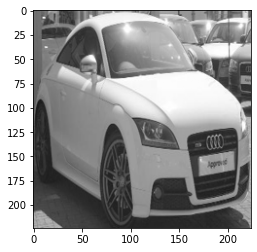

In [50]:
plt.imshow(images[0])

In [51]:
ResNetModel = tf.keras.applications.ResNet50V2(
    include_top=True, weights=None, input_tensor=None, input_shape=None,
    pooling=None, classes=196
)
ResNetModel.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
ResNetModel.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [52]:
ResNetModel.fit(images, trainLabels, epochs=20, batch_size=32, validation_split = 0.2)

Train on 12948 samples, validate on 3237 samples
Epoch 1/20
12948/12948 [==============================] - 5410s 418ms/sample - loss: 5.2983 - accuracy: 0.0117 - val_loss: 5.5442 - val_accuracy: 0.0086
Epoch 2/20
12948/12948 [==============================] - 6784s 524ms/sample - loss: 4.9608 - accuracy: 0.0259 - val_loss: 6.1673 - val_accuracy: 0.0142
Epoch 3/20
12948/12948 [==============================] - 5378s 415ms/sample - loss: 4.4272 - accuracy: 0.0560 - val_loss: 6.0668 - val_accuracy: 0.0173
Epoch 4/20
12948/12948 [==============================] - 6863s 530ms/sample - loss: 3.7804 - accuracy: 0.1243 - val_loss: 17.2136 - val_accuracy: 0.0074
Epoch 5/20
12948/12948 [==============================] - 6046s 467ms/sample - loss: 3.1353 - accuracy: 0.2115 - val_loss: 5.4573 - val_accuracy: 0.0908
Epoch 6/20
12948/12948 [==============================] - 5021s 388ms/sample - loss: 2.5377 - accuracy: 0.3339 - val_loss: 3.9595 - val_accuracy: 0.1866
Epoch 7/20
12948/12948 [========

KeyboardInterrupt: 

In [53]:
ResNetModel.save("carmodel.h5")
model_json = ResNetModel.to_json()
with open("carmodel.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
def topThree(results):
    for result in results:
        top3 = []
        topValues = (result[np.argsort(result)[-3:]])
        for value in topValues:
            index = np.where(result == value)
            top3.insert(0,[value, labels[index[0][0]]])
        print (top3)

In [116]:
def predictColor (ImgName):
    test_path = "C:/Users/The Holy Chin/Downloads/" + ImgName +".jpg"
    # tester = image.load_img(test_path, color_mode = "grayscale", target_size=(224,224))
    tester = image.load_img(test_path, target_size=(224,224))
    tester = image.img_to_array(tester)
    tester = np.array(tester)
    tester = tester/255
    # tester = np.repeat(tester, 3, 2)
    plt.imshow(tester)
    tester = tester.reshape(1, 224, 224, 3)
    result = ResNetModel.predict(tester)
    end = topThree(result)
    return end

In [118]:
def predictGray (ImgName):
    test_path = "C:/Users/The Holy Chin/Downloads/" + ImgName +".jpg"
    tester = image.load_img(test_path, color_mode = "grayscale", target_size=(224,224))
    tester = image.img_to_array(tester)
    tester = np.array(tester)
    tester = tester/255
    tester = np.repeat(tester, 3, 2)
    plt.imshow(tester)
    tester = tester.reshape(1, 224, 224, 3)
    result = ResNetModel.predict(tester)
    end = topThree(result)
    return end

In [139]:
labels

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi A5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi TT Hatchback 2011',
 'Audi S6 Sedan 2011',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi TT RS Coupe 2012',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3

[[0.999193, 'Chrysler Crossfire Convertible 2008'], [0.0001719559, 'Hyundai Azera Sedan 2012'], [9.5147814e-05, 'BMW 6 Series Convertible 2007']]


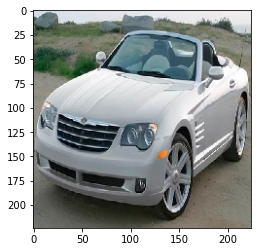

In [138]:
predictColor ('crossfire')

[[0.9991856, 'Chrysler Crossfire Convertible 2008'], [0.00018077769, 'Hyundai Azera Sedan 2012'], [8.7648106e-05, 'BMW 6 Series Convertible 2007']]


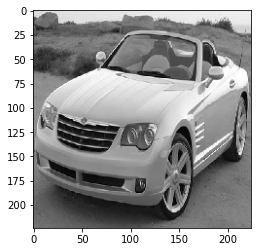

In [136]:
predictGray('crossfire')

[[0.8804636, 'Audi TT Hatchback 2011'], [0.07574567, 'Audi TT RS Coupe 2012'], [0.023961047, 'Spyker C8 Coupe 2009']]


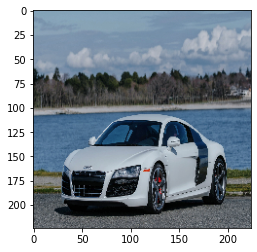

In [142]:
predictColor('audi')

[[0.79328805, 'Audi TT Hatchback 2011'], [0.1102546, 'Audi TT RS Coupe 2012'], [0.052341886, 'Spyker C8 Coupe 2009']]


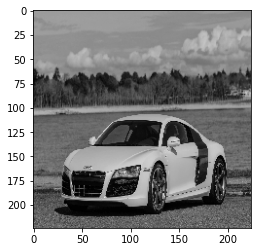

In [153]:
predictGray('audi')

[[0.5634731, 'Hyundai Sonata Hybrid Sedan 2012'], [0.14539309, 'Chrysler Sebring Convertible 2010'], [0.057005778, 'BMW 6 Series Convertible 2007']]


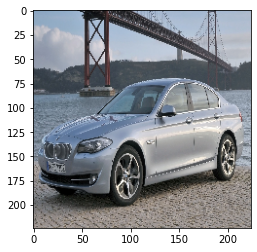

In [143]:
predictColor('bmw')

[[0.49803838, 'Hyundai Sonata Hybrid Sedan 2012'], [0.15472251, 'Chrysler Sebring Convertible 2010'], [0.0661575, 'BMW 6 Series Convertible 2007']]


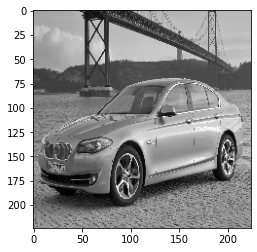

In [154]:
predictGray('bmw')

[[0.48535675, 'Volvo 240 Sedan 1993'], [0.23179832, 'Audi V8 Sedan 1994'], [0.09000311, 'Maybach Landaulet Convertible 2012']]


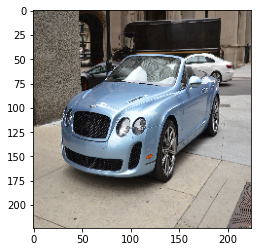

In [144]:
predictColor('bently')

[[0.5344172, 'Volvo 240 Sedan 1993'], [0.20573002, 'Audi V8 Sedan 1994'], [0.07549887, 'Maybach Landaulet Convertible 2012']]


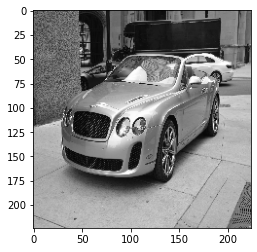

In [155]:
predictGray('bently')

[[0.99280244, 'Bugatti Veyron 16.4 Convertible 2009'], [0.0031182407, 'Bugatti Veyron 16.4 Coupe 2009'], [0.0020715126, 'Lamborghini Diablo Coupe 2001']]


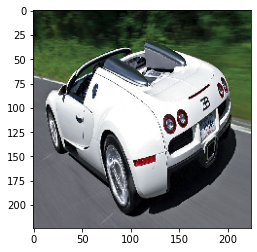

In [146]:
predictColor('bugatti')

[[0.992588, 'Bugatti Veyron 16.4 Convertible 2009'], [0.0034658452, 'Bugatti Veyron 16.4 Coupe 2009'], [0.0019300639, 'Lamborghini Diablo Coupe 2001']]


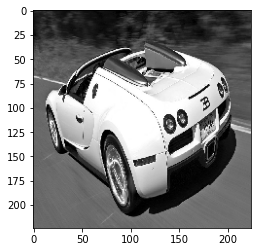

In [156]:
predictGray('bugatti')

[[0.72998655, 'Acura Integra Type R 2001'], [0.09308162, 'Spyker C8 Coupe 2009'], [0.04291534, 'Suzuki SX4 Hatchback 2012']]


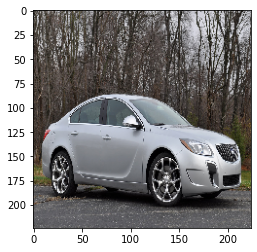

In [149]:
predictColor('buick')

[[0.73337173, 'Acura Integra Type R 2001'], [0.08900305, 'Spyker C8 Coupe 2009'], [0.04501858, 'Suzuki SX4 Hatchback 2012']]


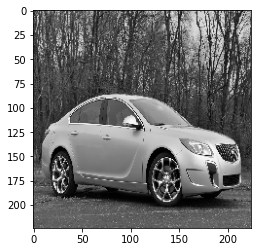

In [158]:
predictGray('buick')

[[0.51541656, 'Geo Metro Convertible 1993'], [0.41285223, 'smart fortwo Convertible 2012'], [0.035091702, 'Ford F-150 Regular Cab 2012']]


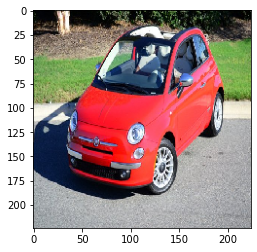

In [151]:
predictColor('fiat')

[[0.80500364, 'Geo Metro Convertible 1993'], [0.13082652, 'smart fortwo Convertible 2012'], [0.042395372, 'Ford F-150 Regular Cab 2012']]


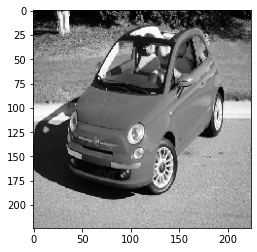

In [159]:
predictGray('fiat')

[[0.7694458, 'Hyundai Tucson SUV 2012'], [0.064868234, 'MINI Cooper Roadster Convertible 2012'], [0.04327862, 'Geo Metro Convertible 1993']]


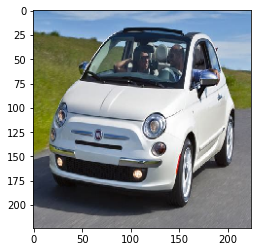

In [152]:
predictColor('fiat2')

[[0.9997161, 'Geo Metro Convertible 1993'], [0.00018163977, 'Chrysler Sebring Convertible 2010'], [6.2947474e-05, 'Chrysler PT Cruiser Convertible 2008']]


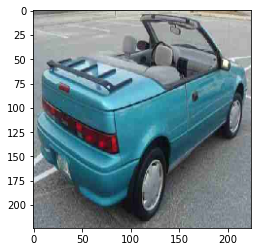

In [160]:
predictColor('geo')